# Universidade Federal do Espírito Santo
# Prof. Alexandre Cândido Xavier
# Disciplina: Geomática I
## Período 2020/1

Para ver bibliografia ver Capitulo 3 da [apostila](https://sites.google.com/site/alexandrecandidoxavierufes/livro-geomatica?authuser=0). 

Aula disponível em:
https://github.com/AlexandreCandidoXavier/ufes_Geomatica1

Para quem quiser manipular:

https://www.python.org/

https://jupyter.org/

https://www.anaconda.com/products/individual

In [1]:
# import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import harmonica as hm
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy as np
from IPython.display import Image
from matplotlib.patches import Ellipse
%matplotlib notebook
warnings.filterwarnings('ignore')

# **Aula de Introdução à Geodésia**



A **geodésia** como objetivo estudar a forma e a dimensão da terra. Para a geodésia a forma da terra he um **geóide**.

## Primeira coisa, a terra não é plana!

https://www.popsci.com/10-ways-you-can-prove-earth-is-round/

## *Superfície topográfica*

Em levantamentos topograficos fazemos medições em pequenas área na superfície da terra

<IPython.core.display.Javascript object>


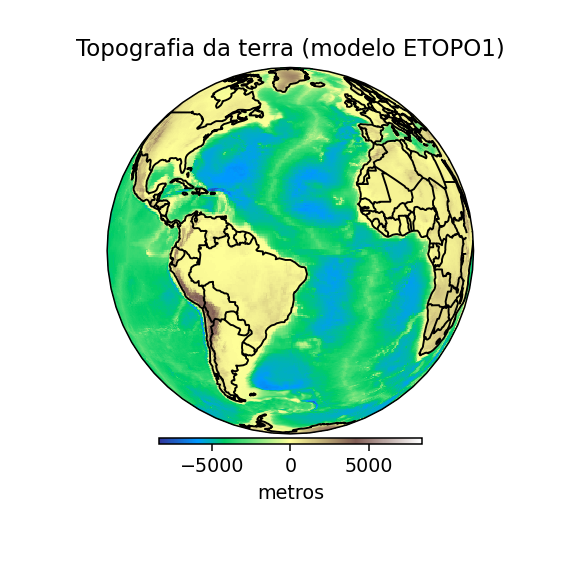

In [2]:
data = hm.datasets.fetch_topography_earth()
plt.figure(figsize=(3, 3))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-40))
pc = data.topography.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap="terrain")
plt.colorbar(pc, label="metros", orientation="horizontal", aspect=50, pad=0.01, shrink=0.6)
ax.set_title("Topografia da terra (modelo ETOPO1)")
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
plt.show()

## Geóide

A forma da terra é definida de **Geóide**. É definida como o nível do mar, desconsiderando-se as marés e os ventos, e seu prolongamento pelos continentes. É uma superfície ondulada e depende da massa da terra. Normalmente para a aprresentação do geóide, fazemos sua comparação com uma figura geométrica denominada de elipsóide (ver texto abaixo), comparando quanto o geóide esta abaixo ou acima desta figura, que denominamos de ondulação geoidal $(N)$.

Para ver vários modelos de geóides, [aqui](http://icgem.gfz-potsdam.de/vis3d/longtime). Na figura abaixo apresentamos o modelo [EIGEN-6C4](https://dataservices.gfz-potsdam.de/icgem/showshort.php?id=escidoc:1119897).

<IPython.core.display.Javascript object>


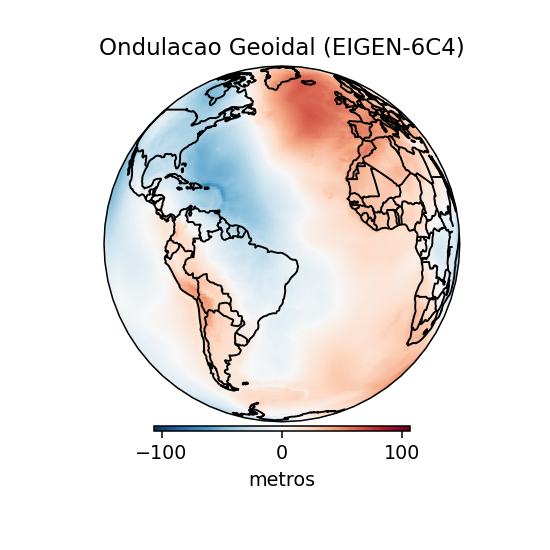

In [3]:
# lendo geoide
data = hm.datasets.fetch_geoid_earth()
plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-40))
pc = data.geoid.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
plt.colorbar(pc, label="metros", orientation="horizontal", aspect=50, pad=0.01, shrink=0.6)
ax.set_title("Ondulacao Geoidal (EIGEN-6C4)")
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
plt.show()

### *Elipse e elipsóide*

Uma vez que o Geoide é ondulado e achatado na direção dos pólos, usamos uma figura geométrica denominada  **elipsóide** para definição da terra e logo de suas coordendas. O **elipsóide** nada mais é do que a forma de uma elipse que rotacionando em seu eixo menor. 

Equação de uma elipse de raios $a$, semi-eixo maior e $b$, semi-eixo menos:

\begin{equation}
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1
\end{equation}

Segundo modelo **WGS84** (WGS, World Geodetic System) os raios do elpsóide são:

$a=6\,378\,137\,\mathrm{m}\,(a=6\,378,137\,\mathrm{km})$ e $b=6\,356\,752,314\,245\,\mathrm{m}\, (b=6\,356,752\,314\,245\,\mathrm{km})$ 

Se fossemos considerar a terra como uma esfera, o raio seria de aproximadamente $6\,367\,\mathrm{km}$:

\begin{equation}
R=\frac{6\,378\,137+6\,356\,752,314\,245}{2}\approx 6\,367\,\mathrm{km}
\end{equation}

<IPython.core.display.Javascript object>


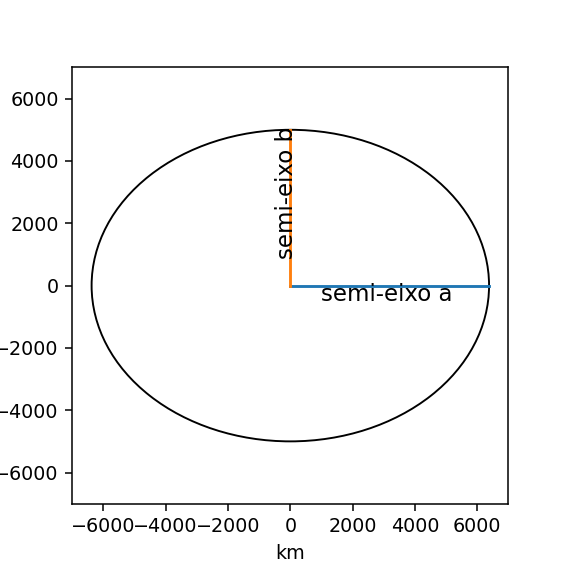

In [4]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(3, 3))
# Semi-exiso maior (a) em quilometros
a = 6378.137 
# Semi-eixo menor (b) em quilometros
b = 6356.752314245
diff_a_b = a-b
b = 5000
e = Ellipse([0,0], width=2 * a, height=2 * b, edgecolor='k', facecolor='none', angle= 360)
ax.plot([0, a], [0, 0])
ax.text(1000, -500, 'semi-eixo a', fontsize=12)
ax.plot([0, 0], [0, b])
ax.text(-500, 1000, 'semi-eixo b', fontsize=12, rotation=90)
ax.add_artist(e)
ax.set_xlabel('km')
ax.set_ylabel('km')
ax.set_xlim(-7000, 7000)
ax.set_ylim(-7000, 7000)
plt.show()

In [5]:
print(f'Diferença entre os raios é de {diff_a_b:0.2f} km do elipsóide WGS84')

Diferença entre os raios é de 21.38 km do elipsóide WGS84


**Elipsóide de revolução**

Temos que considerar as três dimensões $(x,y,z)$. Forma análitica:

\begin{equation}
\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1
\end{equation}

<IPython.core.display.Javascript object>


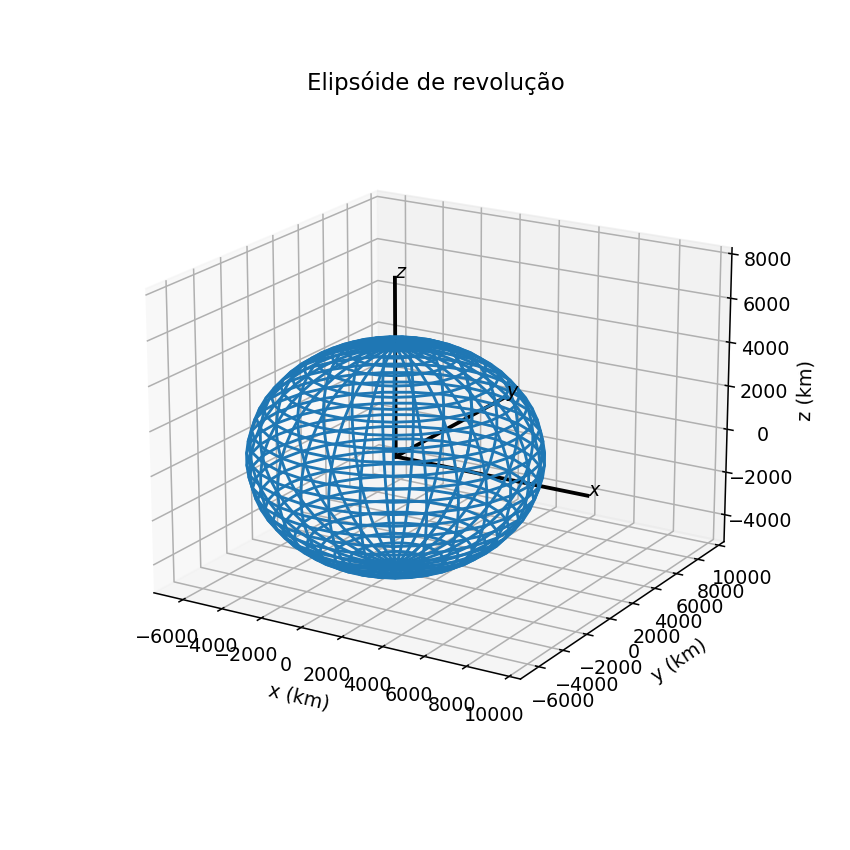

In [6]:
# tem que ver se esta correto
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(a*np.sin(u), np.sin(v))
y = np.outer(a*np.sin(u), np.cos(v))
z = np.outer(b*np.cos(u), np.ones_like(v))
fig = plt.figure(figsize=(4.5, 4.5))
ax = plt.axes(projection='3d')
# b = 4000
offset = 3000
ax.plot([0, a + offset],[0, 0],[0, 0], 'k', linewidth=2)
ax.plot([0, 0], [0,a + offset],[0, 0], 'k', linewidth=2)
ax.plot([0, 0],[0, 0], [0, b + offset], 'k', linewidth=2)
ax.text(a+offset, 0, 0, '$x$')
ax.text(0, a+offset, 0, '$y$')
ax.text(0, 0, b+offset, '$z$')
ax.plot_wireframe(x, y, z)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
# ax.axis('off')
plt.title('Elipsóide de revolução')
plt.show()

**Achatamento $f$**

\begin{equation}
f=\frac{a-b}{a}=1-\frac{b}{a}
\end{equation}

**Fazer exemplo na apostila para o WGS84**.

## Coordenada geodésica (geográfica, $(\phi,\lambda,h)$)

Para a determinação da latitude  ($\phi$, leia-se *fi*) e da longitude ($\lambda$, leia-se *lambda*) geodésica
de um ponto $P$ qualquer, é considerada a normal $P'$ ao elipsóide ($P'$) e:
<ol>
<li>sua projeção com o plano do Equador, para a latitude geodésica $(\phi_{p})$; </li>
<li>o meridiano de <a href="https://en.wikipedia.org/wiki/Prime_meridian_(Greenwich)">Greenwich</a>  (Grw)   e o meridiano que passa por $P'$, para a longitude geodésica $(\lambda_{P})$ e;</li> 
<li>a distância entre $P$ e $P'$, altura geodésica $(h_{P}$, também denominada de geométrica).</li>
</ol>


Ver paralelos e meridianos [aqui](https://earth.google.com/web/@14.9062884,-40.92003189,-7715.1595463a,16971945.54792881d,35y,0.00000121h,0t,0r).

**Quanto corresponde em $1^\circ$ em quilometros na linha do equador? Considere o raio da terra de $6\,367$ km**

## Coordenada geodésica (cartesiana)

Um outro meio de estabelecer a localização espacial de um ponto, por
exemplo o $P$, a um determinado elipsóide, é por meio de sua coordenada
geodésica cartesiana ($x_{P},\,y_{P},\,z_{P}$), também denominado
de sistema de coordenada geocêntrico.
Este é o sistema onde primeiramente a coordenada de um ponto é determinada
pelos receptores GNSS. As coordenadas geodésicas retangulares também
são utilizadas para efetuar transformação de coordenadas entre elipsoides.

Definiremos primeiro a origem do sistema e os eixos-$x$, -$y$ e
-$z$, sendo: a origem, o centro do elipsóide; o eixo-$z$ é aquele
que coincide com o semieixo menor do elipsóide, eixo de rotação; o
eixo-$x$ é aquele dado pela intersecção do plano do Equador com o
meridiano de Grw; e o eixo-$y$ formando um diedro com os outros eixos. Quando as coordenadas
Geodésicas são conhecidas, utilizam-se Equações abaixo
para convertê-las retangulares.


\begin{equation}
x =\left(N+h\right)\cos\phi\cos\lambda\label{eq:cart_x}
\end{equation}
\begin{equation}
y =\left(N+h\right)\cos\phi\sin\lambda\label{eq:cart_y}
\end{equation}
\begin{equation}
z =\left({\displaystyle \frac{b^{2}}{a^{2}}N+h}\right)\sin\phi\label{eq:cart_z}
\end{equation}

\noindent em que: $N$ é denominado de grande normal, correspondendo
ao comprimento da vertical que passa por $P'$ ao eixo-zdado por:

\begin{equation}
N =\frac{a^{2}}{\sqrt{a^{2}\cos^{2}\phi+b^{2}\sin^{2}\phi}}\label{eq:grande_normal}
\end{equation}

Para obter coordenadas geográficas por meio das coordenadas retângulares, ver apostila. 

In [7]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='https://raw.githubusercontent.com/AlexandreCandidoXavier/ufes_Geomatica1/main/images/coor_geodesica_retangu-1.png', width=600, height=600)


## **Sistema Geodésico Brasileiro (SGB)**

Definição:

*Conjunto de informações planimétricas, altimétricas e gravimétricas referentes às estações do Sistema Geodésico Brasileiro - SGB utilizadas para referência em atividades de posicionamento e às demais estações estabelecidas pelo IBGE para correção e verificação de imagens do território.* (https://www.ibge.gov.br/geociencias/informacoes-sobre-posicionamento-geodesico/rede-geodesica.html)


In [8]:
Image(url='https://raw.githubusercontent.com/AlexandreCandidoXavier/ufes_Geomatica1/main/images/geoides.png', width=500) 

## **Datum horizontal e vertical**

### Datum horizontal

Para o Brasil já tivemos o **Corrego Alegre**, **SAD69**. Atualmente é adotado o [SIRGAS2000](ftp://geoftp.ibge.gov.br/informacoes_sobre_posicionamento_geodesico/rede_planialtimetrica/relatorio/rel_sirgas2000.pdf). Utilizamos para determinar as coordenada geográficas $(\phi,\lambda,h)$, sendo $h$ a altura geométrica, e UTM $(E, N)$.

Ver rede [aqui](http://www.bdg.ibge.gov.br/appbdg/)

### Datum vertical

São duas as referencias de altitude adotado pelo Brasil, que coincide
com nível médio dos mares (NMM), sendo: *i*)
o **Datum de Imbituba**, definido de observações
da maré em Imbituba, Santa Catarina entre os anos de 1949 e 1957, na Figura ao lado as referências de nível em vermelho e;
e *ii*) o **Datum de Santana**, definido de observações da maré no estado do Amapá
entre os anos de 1957 a 1958, as referências de nível cor verde.
O **Datum de Santana** deu-se devido a
impossibilidade de estender a rede de Imbituba à região do Amapá.
Na Figura ao lado são apresentadas as posições da referência
altimétrica do SGB, sendo um total de $9\,397$ referências de nível,
$475$ e $8\,922$, respectivamente, referentes ao **Datum de Santana** e ao
**Datum de Imbituba**. Ver rede [aqui](ftp://geoftp.ibge.gov.br/informacoes_sobre_posicionamento_geodesico/rede_altimetrica/cartograma/altitotal.pdf).

## **Projeção cartográfica**

Projeções cartográficas são funções matemáticas que transformam as
coordenadas geodésicas ($\phi,\,\lambda$) para coordenadas planas
($x,\,y$), isto é, ${x=f(\phi,\,\lambda)}$ e ${y=f(\phi,\,\lambda)}$.
Podem-se classificar as projeções cartográficas de acordo com:

<ol>
<li>a superfície utilizada na projeção: <b>plana</b> (Figuras a, d, g), <b>cilíndrica</b> (Figuras b, e, h) ou <b>cônica</b> (Figuras c, f, i). Na prática, a projeção é realizada analiticamente, ou seja, por meio
de equações matemáticas, que são variantes destas formas geométricas;</li> 

<li>se é <b>tangente</b> ou <b>secante</b>;</li> 


<li> a posição da figura geométrica, por exemplo, caso a projeção seja
cilíndrica tangente, ela é dita como sendo <b>normal</b> se o cilindro é
tangente no equador (e.g. Figura b); <b>transversa</b>,
caso o cilindro seja tangente a um meridiano (e.g. Figura e); e é <b>oblíqua</b>. caso o cilindro seja tangente à qualquer seção normal que passa pelo ponto central (e.g. Figura h).</li>
</ol>


As características consideradas na projeção são:

<ol>
<li>Área: projeções que mantém a área são denominadas de <b>igual
área</b> ou <b>equivalente</b>,
sendo aquela em que uma área de uma forma qualquer, como um círculo
de qualquer tamanho na terra, em qualquer parte do mapa, a sua projeção
vai cobrir a mesma área. A forma, ângulos e escala estarão distorcidos
na maior parte do mapa;</li>

<li>Forma: são aquelas projeções que mantém a forma, sendo denominadas
de projeções <b>conforme</b>.
Nesta projeção os ângulos locais em cada ponto do mapa são mostrados
corretamente. Como os ângulos são mantidos corretos, a intersecção
dos meridianos com os paralelos formam ângulos retos. As área são
aumentadas ou diminuídas ao longo do mapa.</li>
</ol>

In [9]:
Image(url='https://raw.githubusercontent.com/AlexandreCandidoXavier/ufes_Geomatica1/main/images/proj_tipos-1_cv2.png', width=600)

**Projeção do tipo secante.**

In [10]:
Image(url='https://raw.githubusercontent.com/AlexandreCandidoXavier/ufes_Geomatica1/main/images/proj_tipos_secante_cv2.png', width=500)

## **Exemplo de projeções**

Os circulos e elipses nos mapas são denominados de indicatriz de *Tissot*. Eles servem para caracterizar as distroções locais devido a projeção cartográfica. Para os nossos exemplos, adotamos o raio de $1\,000$ km. Os resultados são elipses que mostra as variações de escala em dois eixos.

### **Albert Conica, igual área/equivalente**

É uma projeção cônica de igual-área, normalmente utilizada para os Estados Unidos 

<IPython.core.display.Javascript object>


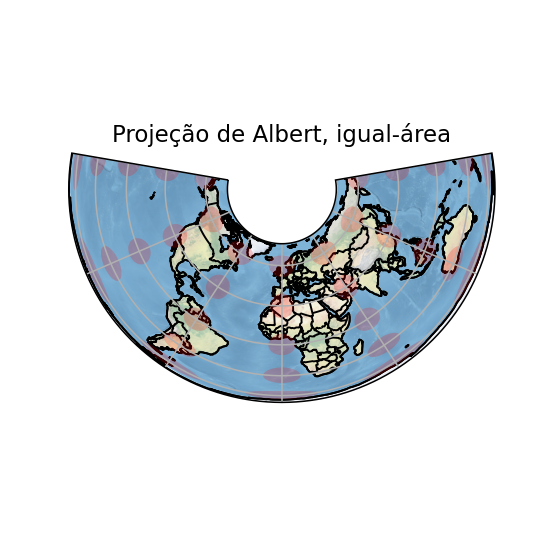

In [11]:
plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.coastlines(resolution='110m')
ax.gridlines()
plt.title('Projeção de Albert, igual-área')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90,90, 30)) 
plt.show()

### **Conica equidistante**

A escala é verdadeira em todos os meridianos e ao longo de dois paralelos neste caso, latitude de $20^\circ$ e $40^\circ$ graus 

<IPython.core.display.Javascript object>


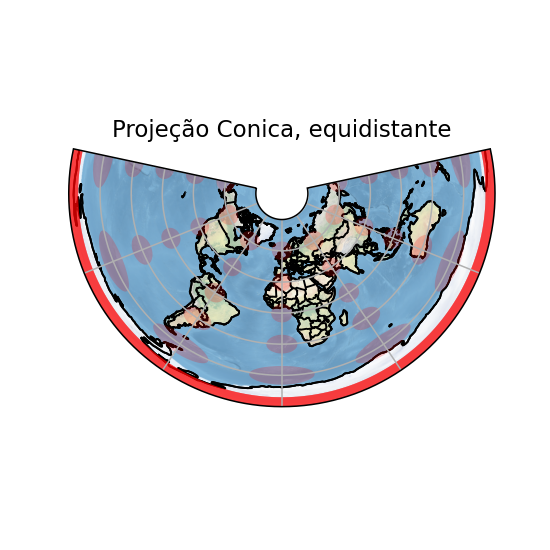

In [12]:
plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.EquidistantConic())
ax.coastlines(resolution='110m')
ax.gridlines()
plt.title('Projeção Conica, equidistante')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90, 90, 30)) 
plt.show()

### **Conica de Lambert**

Projeção de Lambert é to tipo cônica e conforme (mantem a forma)

<IPython.core.display.Javascript object>


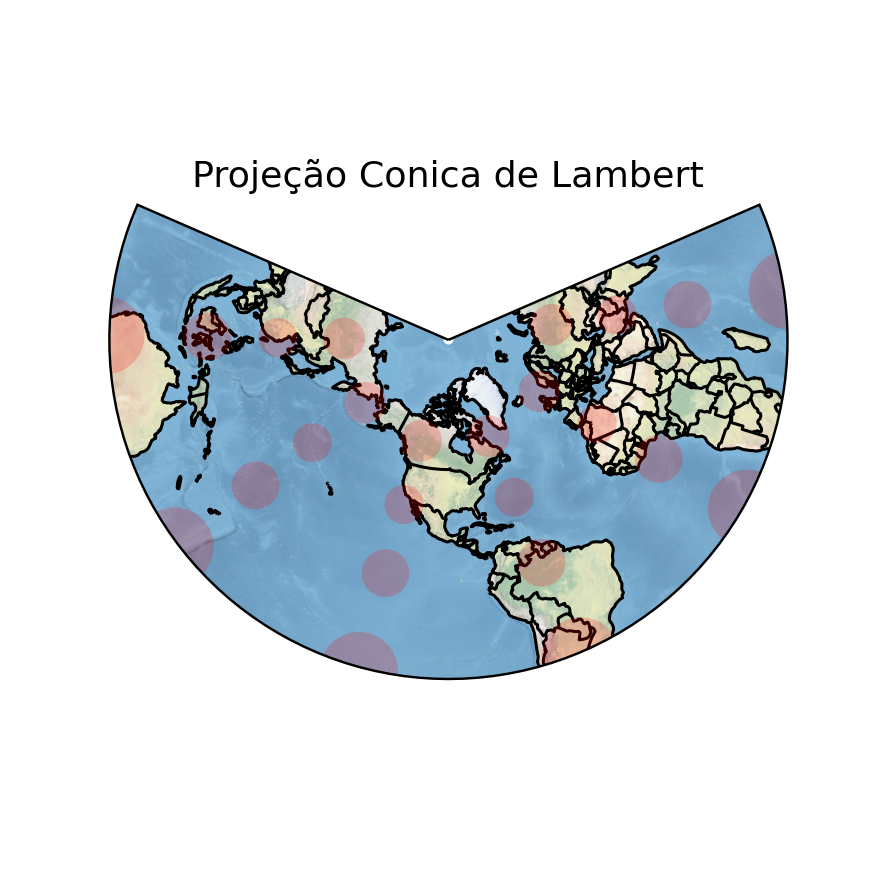

In [26]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.title('Projeção Conica de Lambert')
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90,90, 30)) 
plt.show()

### **Mercator**

Apenas uma latitude tem a escala verdadeira.

<IPython.core.display.Javascript object>


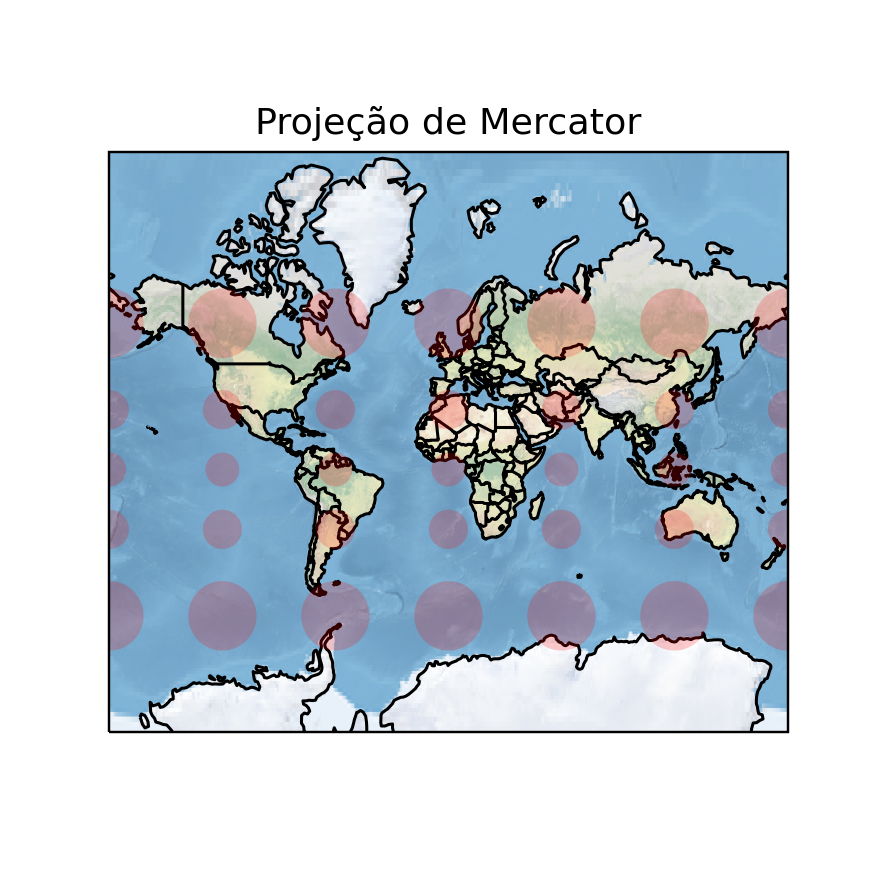

In [27]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.title('Projeção de Mercator')
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90,90, 30)) 
plt.show()

### **Mollweide**

Esta projeção é falsa-cilíndrica e igual-área.

<IPython.core.display.Javascript object>


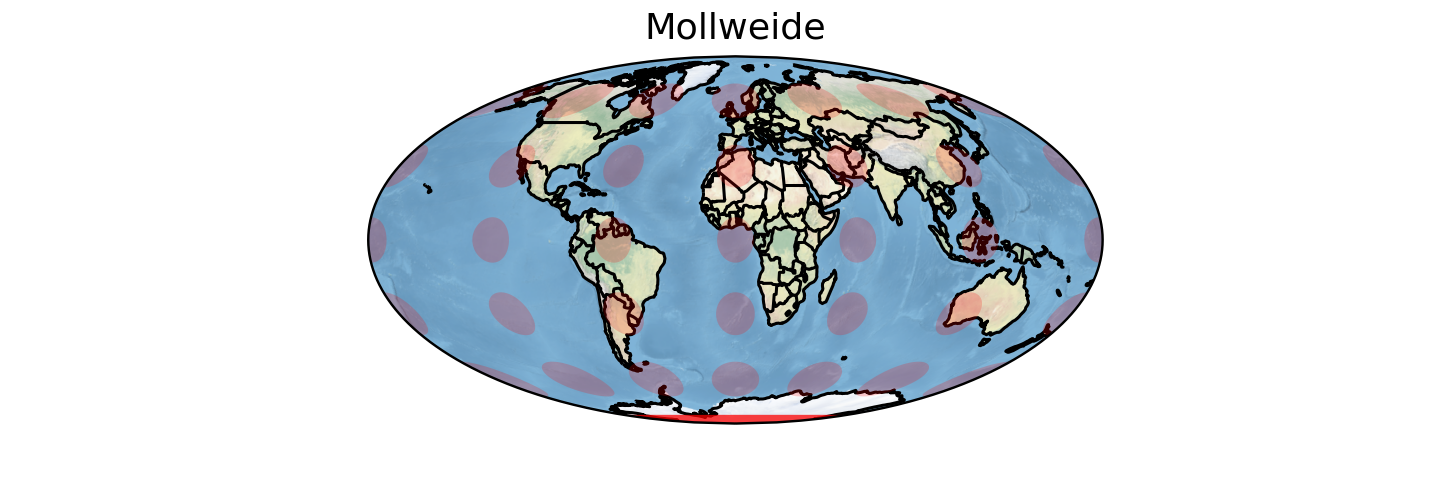

In [31]:
fig = plt.figure(figsize=(3, 1))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.title('Mollweide')
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90, 90, 30)) 
plt.show()

### **Orthográfica**

<IPython.core.display.Javascript object>


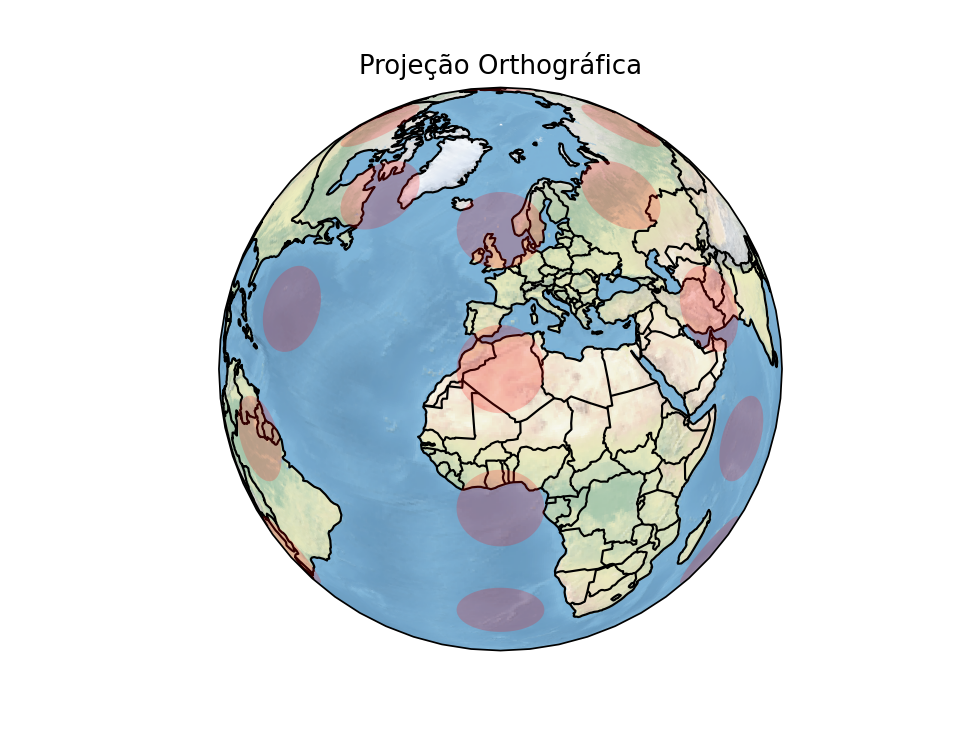

In [35]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=0,
                                                      central_latitude=30.0,))
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.title('Projeção Orthográfica')
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90,90, 30)) 
plt.show()

### **Sinusoidal**

Igual-área.

<IPython.core.display.Javascript object>


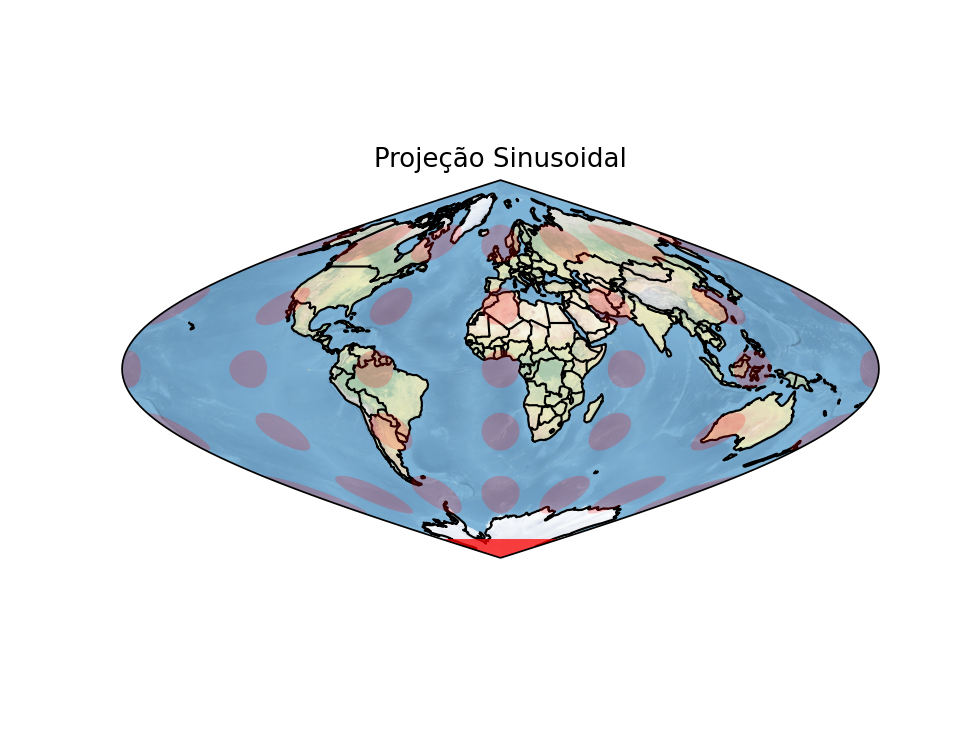

In [36]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Sinusoidal())
ax.set_global()
ax.stock_img()
ax.coastlines()
plt.title('Projeção Sinusoidal')
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90,90, 30)) 
plt.show()

### **InterruptedGoodeHomolosine**

<IPython.core.display.Javascript object>


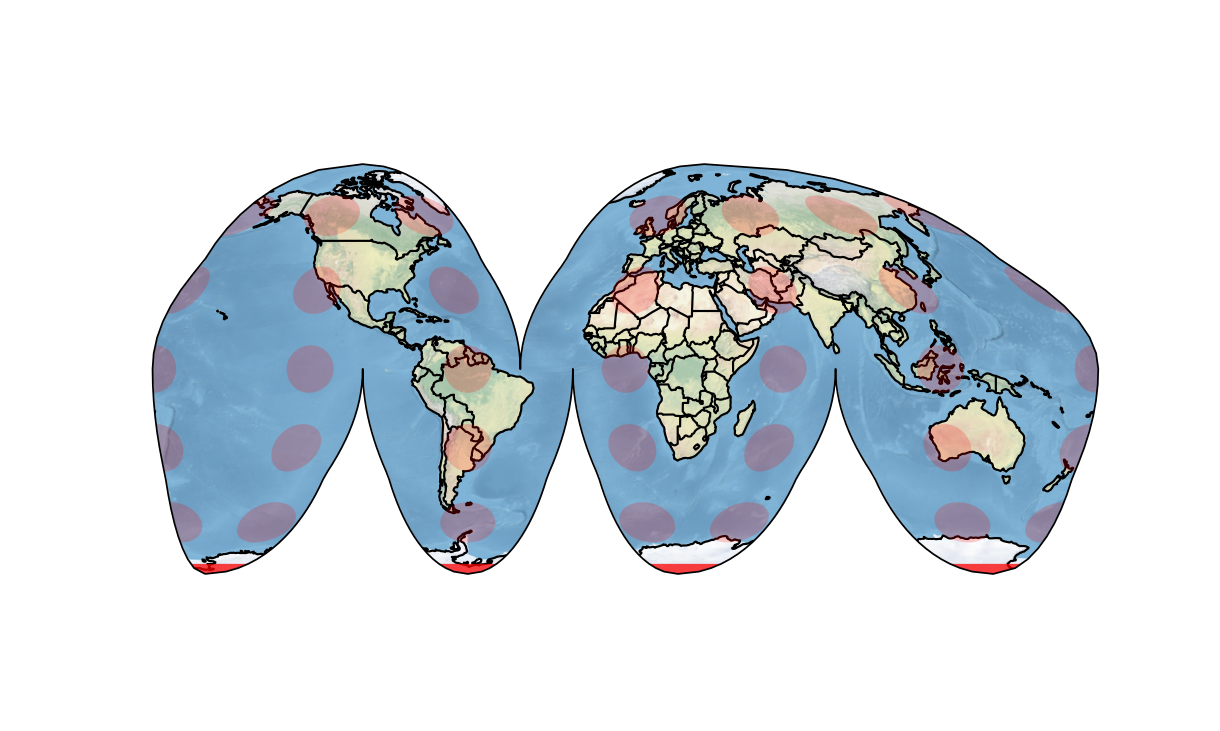

In [25]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.InterruptedGoodeHomolosine())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.tissot(rad_km=1000, facecolor='r', alpha=.2, lats=np.arange(-90,90, 30))
plt.show()

<IPython.core.display.Javascript object>


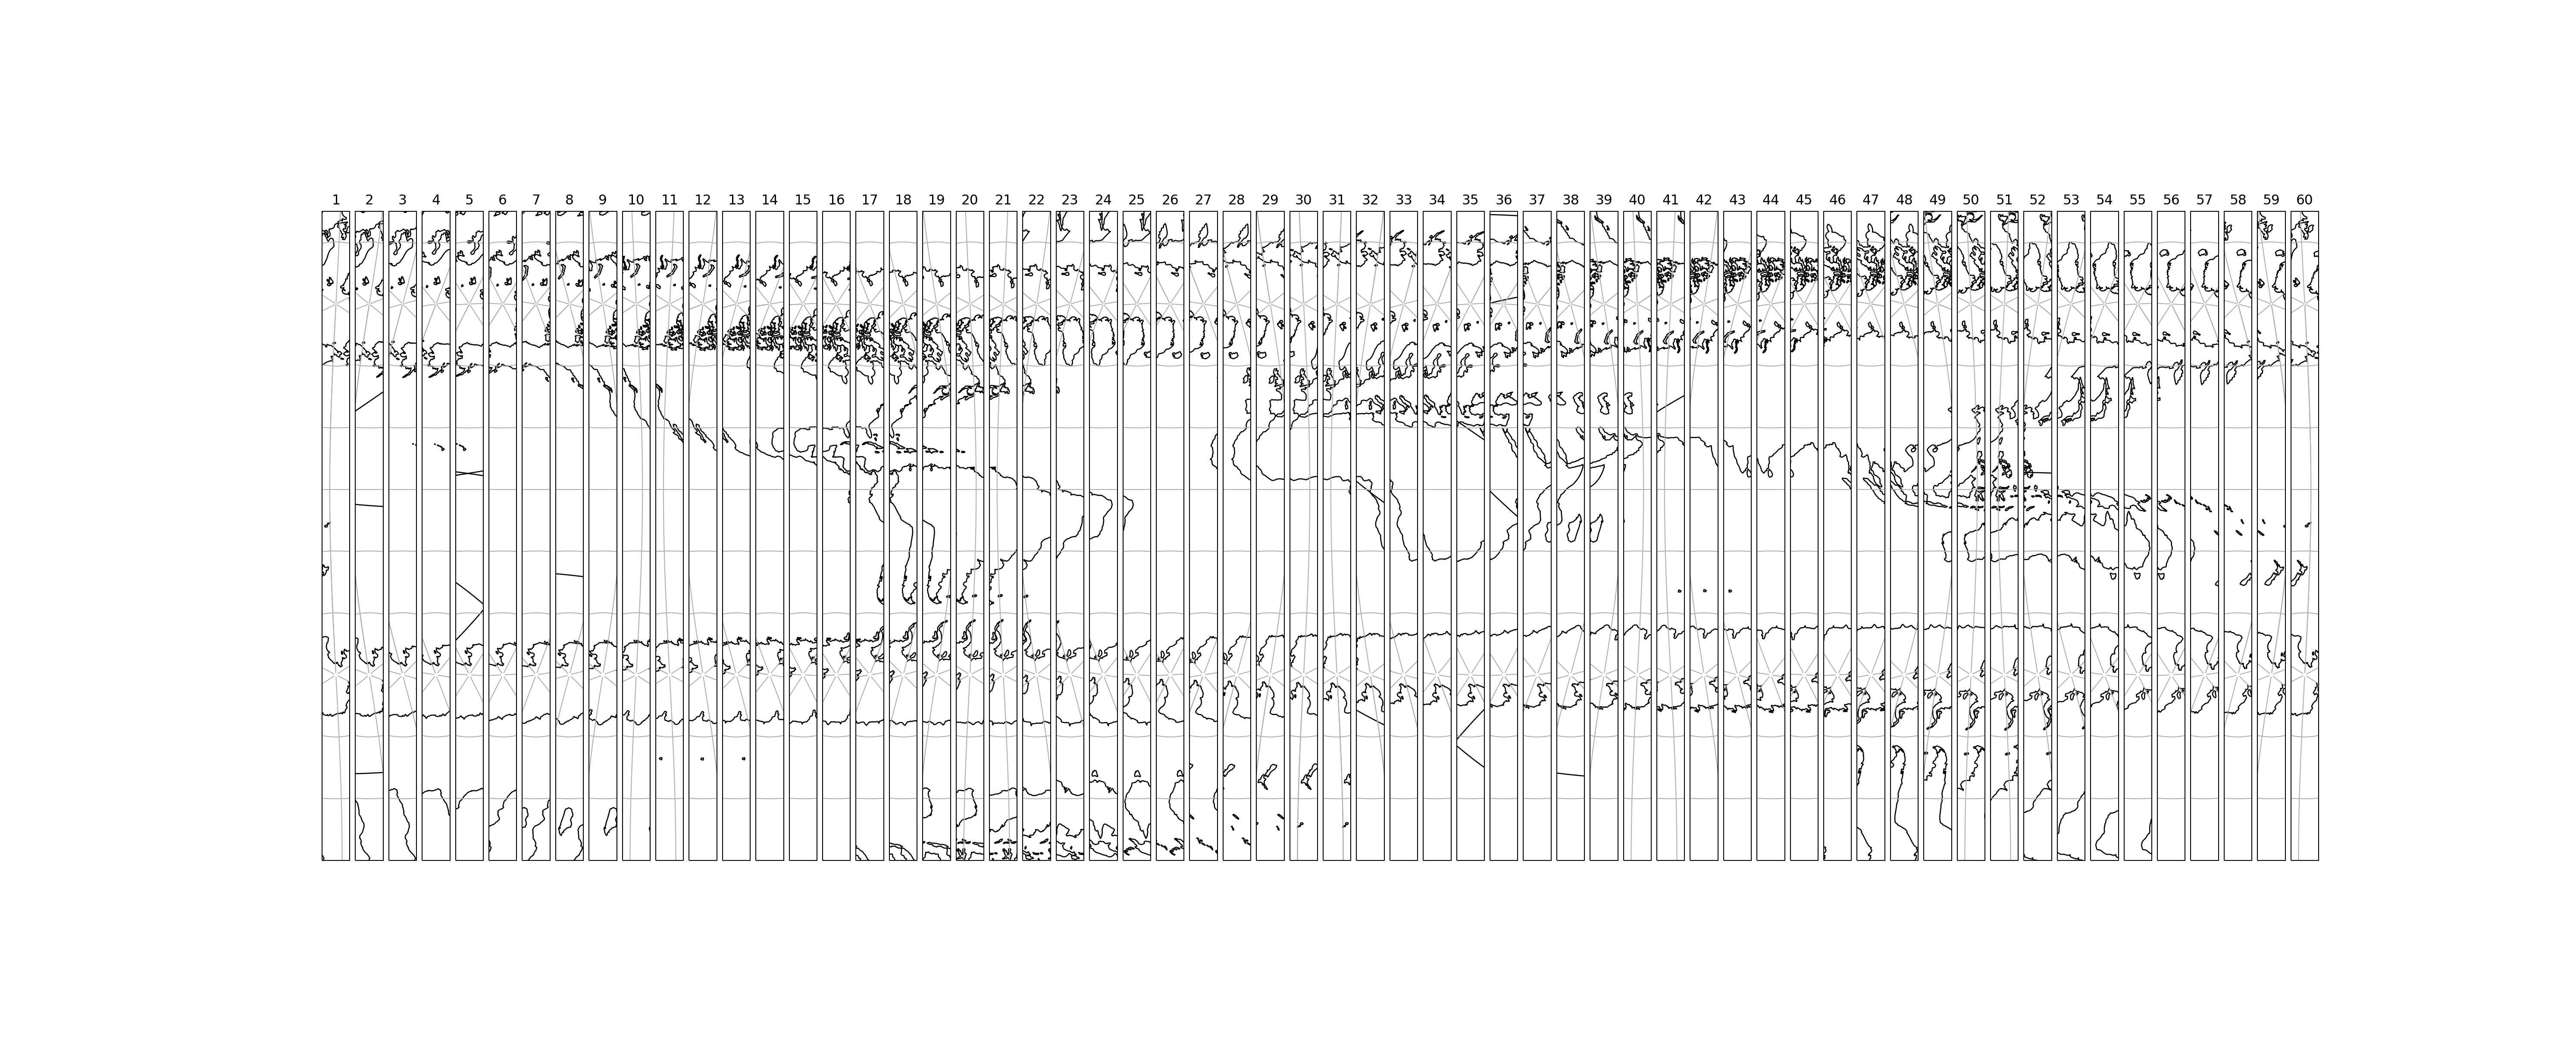

In [13]:
nplots = 60

fig = plt.figure(figsize=(17, 7))

for i in range(0, nplots):
    ax = fig.add_subplot(1, nplots, i+1,
                         projection=ccrs.UTM(zone=i+1,
                                             southern_hemisphere=True))
    ax.coastlines(resolution='110m')
    ax.set_title(i+1)
    ax.gridlines()

**Plotando faixa do Fuso 24 para a nossa região**

<IPython.core.display.Javascript object>


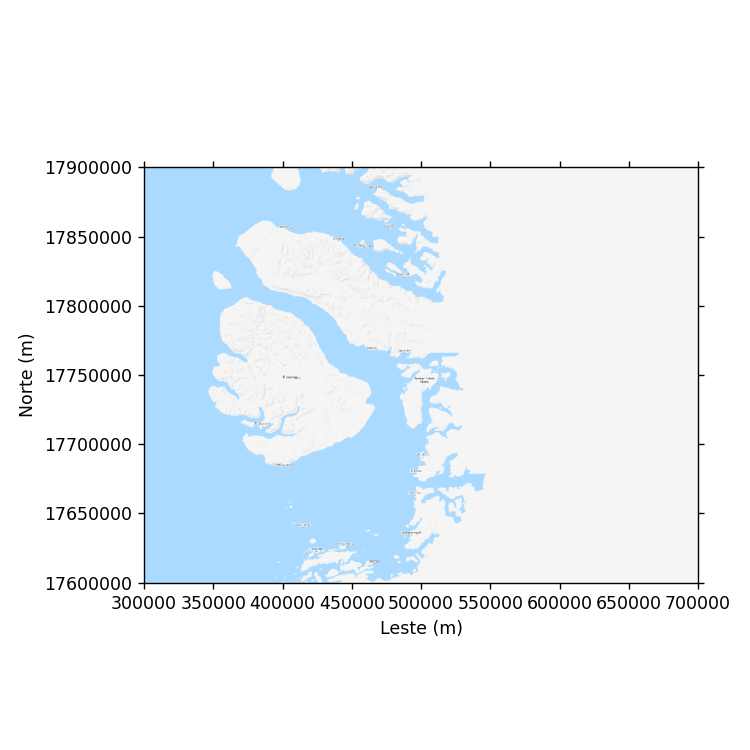

In [25]:
#%matplotlib qt 
from cartopy.io.img_tiles import GoogleTiles
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection=ccrs.UTM(zone=22, southern_hemisphere=True))
ax.set_extent((300000, 700000, 7600000, 7900000), crs=ccrs.UTM(zone=22))
tiler = GoogleTiles()
zoom = 8
ax.add_image(tiler, zoom )
def label_utm_grid():
    ''' Warning: should only use with small area UTM maps '''
    ax = plt.gca()    
    for val,label in zip(ax.get_xticks(), ax.get_xticklabels()):
        label.set_text(str(val))
        label.set_position((val,0))  
    name_ytick = []
    for val,label in zip(ax.get_yticks(), ax.get_yticklabels()):
        # print(str(val)[:-2])
        label.set_position((0,val))
        label.set_text(str(val)[:-2])
        name_ytick.append(str(val)[:-2])
        

    plt.tick_params(bottom=True,top=True,left=True,right=True,
            labelbottom=True,labeltop=False,labelleft=True,labelright=False)

    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    plt.grid(True)
    return name_ytick
    
    
name_ytick = label_utm_grid()
ax.set_yticklabels(name_ytick)
ax.set_xlabel('Leste (m)')
ax.set_ylabel('Norte (m)')
plt.tight_layout()
# ax.set_extent([], crs=ccrs.UTM(zone="24K"))